In [1]:
import pandas as pd
import os.path
import requests



#loading the main dataset
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [2]:

#downloading the image predictions dataset programmatically
fileurl = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(fileurl)

if os.path.isfile('image-predictions.tsv') == False:
    with open('image-predictions.tsv', mode = 'wb') as file:
        file.write(response.content)

im_pred = pd.read_csv('image-predictions.tsv', sep = '\t')
im_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
#gathering the twitter data using Twitter API

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [3]:
#importing the data from the json file

dflist = []
import json
with open('tweet-json.txt') as file:
    for line in file:
        dflist.append(json.loads(line))
df_tweet = pd.DataFrame(dflist)
df_tweet.head()

#gathering data completed

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


Assessing Data:
through a careful visual observation and programmatic assessment, the following was noticed: 

Tidiness issues:  
1- All data tables can be merged into one table (each observational unit forms a table)  
2- Dog stages are in four different columns and need to be molten into one (each variable forms a column)   
  
Quality issues:  
1- multiple columns need to be dropped as they have no value in analysis.  
2- timestamp column in the main dataset is in object format.  
3- Multiple columns contain "None" values instead of Nan  
4- remove retweets and keep original tweets.  
5- Name column contain an invalid dog name (a)  
6- some rating denominators have values higher than 10. This is associated with multiple dogs in the same tweet/image.  
7- dog image predictions contain false values (not dogs)  
8- rating numerators less than 10 are usually associated with objects that resemble dogs  



In [4]:

#tidiness issue #1 - merging all 3 datasets into one
df_clean = pd.merge(df, im_pred, left_on = 'tweet_id', right_on='tweet_id')
df_clean = pd.merge(df_clean, df_tweet, left_on='tweet_id', right_on='id')

In [5]:
print(df_clean.columns, df_clean.shape)

Index(['tweet_id', 'in_reply_to_status_id_x', 'in_reply_to_user_id_x',
       'timestamp', 'source_x', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'contributors', 'coordinates', 'created_at',
       'display_text_range', 'entities', 'extended_entities', 'favorite_count',
       'favorited', 'full_text', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id_y',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_y',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'sou

In [6]:
#quality issues #1 - dropping unnecessary columns

del_cols = set(df_clean.columns) - set(['tweet_id', 'timestamp', 'text', 'retweeted_status_id','expanded_urls',
        'retweeted_status_user_id','rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url', 'p1',
       'p1_conf', 'p1_dog', 'favorite_count', 'retweet_count'])
df_clean = df_clean.drop(columns=del_cols)

In [7]:
df_clean.head()

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,p1,p1_conf,p1_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,42908,8964
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,41048,9774


In [8]:
#quality issue #2 - changing timestamp column to date-time format
df_clean.timestamp = pd.to_datetime(df_clean.timestamp);

In [9]:
#quality issue #3 - replacing 'none' with Nan for accurate analysis
import numpy as np
df_clean = df_clean.replace(['None', 'none'], np.nan)

In [10]:
#tidiness issue #2 - melting dog stages columns into one and dropping duplicates

df_clean = df_clean.melt(id_vars = ['tweet_id', 'timestamp', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'favorite_count',
       'retweet_count'], value_name = 'stage', var_name = 'vari').drop(columns=['vari']).sort_values('stage').drop_duplicates(subset='tweet_id', keep='first')


In [11]:
#df_clean.head()
print(df_clean.shape)

(2073, 16)


In [12]:
len(df_clean.retweeted_status_id) == len(df_clean.retweeted_status_user_id)

True

In [13]:
#quality issue $4 removing retweets and keeping original tweets 
df_clean = df_clean[df_clean.retweeted_status_id.isnull()].drop(columns=['retweeted_status_id', 'retweeted_status_user_id'])

In [14]:
#changing columns back to 'int' data type since they were changed after the melting process
intcols = ['tweet_id', 'rating_numerator', 'rating_denominator', 'favorite_count', 'retweet_count']

df_clean[intcols] = df_clean[intcols].astype(int)

In [15]:
print(df_clean.columns, df_clean.shape)

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'p1', 'p1_conf', 'p1_dog',
       'favorite_count', 'retweet_count', 'stage'],
      dtype='object') (1994, 14)


In [16]:
df_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,p1_dog,favorite_count,retweet_count,stage
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,32467,7711,doggo
722,759793422261743616,2016-07-31 16:50:42,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,golden_retriever,0.985876,True,6620,2173,doggo
713,760893934457552897,2016-08-03 17:43:45,This is Wishes. He has the day off. Daily stru...,https://twitter.com/dog_rates/status/760893934...,11,10,Wishes,https://pbs.twimg.com/media/Co88_ujWEAErCg7.jpg,Blenheim_spaniel,0.113992,True,4228,1104,doggo
679,767191397493538821,2016-08-21 02:47:37,I don't know any of the backstory behind this ...,https://twitter.com/dog_rates/status/767191397...,13,10,NaN,https://pbs.twimg.com/media/CqWcgcqWcAI43jm.jpg,patio,0.708665,False,13643,4406,doggo
675,768193404517830656,2016-08-23 21:09:14,Meet Gerald. He's a fairly exotic doggo. Floof...,https://twitter.com/dog_rates/status/768193404...,8,10,Gerald,https://pbs.twimg.com/media/Cqkr0wiW8AAn2Oi.jpg,lion,0.396984,False,12157,4080,doggo


In [17]:
df_clean.name.value_counts()

a             55
Charlie       11
Cooper        10
Lucy          10
Oliver        10
Tucker         9
Penny          9
Sadie          8
Winston        8
Daisy          7
Lola           7
Toby           7
the            7
Jax            6
Bella          6
Bo             6
an             6
Koda           6
Stanley        6
Leo            5
Oscar          5
Dave           5
Bailey         5
Louis          5
Rusty          5
Buddy          5
Chester        5
Milo           5
Scout          5
Bear           4
              ..
Mojo           1
JD             1
Wesley         1
Holly          1
Venti          1
Bodie          1
Pilot          1
Dido           1
Bilbo          1
Vixen          1
Longfellow     1
Bobby          1
Pubert         1
Napolean       1
Fwed           1
Brian          1
Sundance       1
Florence       1
Spark          1
Jonah          1
Zoe            1
Craig          1
Snicku         1
Tripp          1
Emmy           1
Emma           1
Eve            1
Lucia         

In [18]:
#quality issue #5 - name column contains an invalid dog name (a) replaced with NaN
df_clean.loc[df_clean.name == 'a', 'name'] = np.nan

In [19]:
#quality issue #6 dropping rows where rating denominator is higher than 10, 
#since this is associated with multiple dogs in the same tweet/image

df_clean.drop(df_clean[df_clean.rating_denominator > 10].index, axis=0, inplace=True)

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 9 to 2072
Data columns (total 14 columns):
tweet_id              1978 non-null int64
timestamp             1978 non-null datetime64[ns]
text                  1978 non-null object
expanded_urls         1978 non-null object
rating_numerator      1978 non-null int64
rating_denominator    1978 non-null int64
name                  1390 non-null object
jpg_url               1978 non-null object
p1                    1978 non-null object
p1_conf               1978 non-null float64
p1_dog                1978 non-null bool
favorite_count        1978 non-null int64
retweet_count         1978 non-null int64
stage                 306 non-null object
dtypes: bool(1), datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 218.3+ KB


In [21]:
#checking for duplicate values across all columns
dup_dict = {}
for col in df_clean.columns:
    dup_sum = df_clean[col].duplicated().sum()
    if dup_sum > 0:
        dup_dict[col] = dup_sum
print(dup_dict)


{'rating_numerator': 1957, 'rating_denominator': 1975, 'name': 1046, 'p1': 1604, 'p1_conf': 3, 'p1_dog': 1976, 'favorite_count': 142, 'retweet_count': 397, 'stage': 1973}


In [22]:
#quality issue #7 - dog image predictions contain false values (not dogs)
df_clean.loc[df_clean.p1_dog == False, 'p1'] = np.nan

In [23]:
df_clean.reset_index(inplace=True, drop=True)

In [24]:
df_clean.drop(columns=['p1_dog', 'p1_conf'], inplace = True)

In [25]:
#quality issue #8 - dog image prediction column name is not clear
df_clean.rename(columns = {'p1' : 'dog_breed'}, inplace=True)

In [26]:
pd.set_option('display.max_colwidth', -1)

In [27]:
df_clean[df_clean['rating_numerator'] < 10].rating_numerator.value_counts().sum()

411

In [28]:
#quality issue #9 - rating numerators less than 10 are usually associated with objects that resemble dogs
#also it's unfair since almost all ratings are higher than 10
#new dataset with dog ratings always higher than 10

df_final = df_clean.drop(df_clean[df_clean.rating_numerator < 10].index, axis=0)

In [29]:
df_final.rating_numerator.value_counts()

12      450
10      419
11      396
13      261
14      35 
1776    1  
420     1  
75      1  
27      1  
26      1  
24      1  
Name: rating_numerator, dtype: int64

In [30]:
df_final.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,dog_breed,favorite_count,retweet_count,stage
0,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,32467,7711,doggo
1,759793422261743616,2016-07-31 16:50:42,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,golden_retriever,6620,2173,doggo
2,760893934457552897,2016-08-03 17:43:45,This is Wishes. He has the day off. Daily struggles of being a doggo have finally caught up with him. 11/10 https://t.co/H9YgrUkYwa,https://twitter.com/dog_rates/status/760893934457552897/photo/1,11,10,Wishes,https://pbs.twimg.com/media/Co88_ujWEAErCg7.jpg,Blenheim_spaniel,4228,1104,doggo
3,767191397493538821,2016-08-21 02:47:37,I don't know any of the backstory behind this picture but for some reason I'm crying. 13/10 for owner and doggo https://t.co/QOKZdus9TT,https://twitter.com/dog_rates/status/767191397493538821/photo/1,13,10,NaN,https://pbs.twimg.com/media/CqWcgcqWcAI43jm.jpg,NaN,13643,4406,doggo
5,775364825476165632,2016-09-12 16:05:54,This is Finley. He's an independent doggo still adjusting to life on his own. 11/10 https://t.co/7FNcBaKbci,"https://twitter.com/dog_rates/status/775364825476165632/photo/1,https://twitter.com/dog_rates/status/775364825476165632/photo/1,https://twitter.com/dog_rates/status/775364825476165632/photo/1,https://twitter.com/dog_rates/status/775364825476165632/photo/1",11,10,Finley,https://pbs.twimg.com/media/CsKmMB2WAAAXcAy.jpg,beagle,8295,3472,doggo


In [31]:
# INSIGHT #1 most favorited dog breeds

df_final.groupby('dog_breed').favorite_count.mean().sort_values(ascending=False)[:5]

dog_breed
black-and-tan_coonhound    33911.0
standard_poodle            26238.5
Saluki                     24060.0
French_bulldog             22765.4
Afghan_hound               22451.0
Name: favorite_count, dtype: float64

In [32]:
# INSIGHT #2 highest rated dog breeds

df_final.groupby('dog_breed').rating_numerator.mean().sort_values(ascending=False)[:5]

dog_breed
clumber                    27.0
black-and-tan_coonhound    14.0
Bedlington_terrier         13.5
Afghan_hound               13.0
Appenzeller                13.0
Name: rating_numerator, dtype: float64

In [33]:
# INSIGHT #3 most loved dog breed (highest rated and highest favorite count)

highest_rated = df_final.groupby('dog_breed').rating_numerator.mean().sort_values(ascending=False)[:10].index
most_favorited = df_final.groupby('dog_breed').favorite_count.mean().sort_values(ascending=False)[:10].index

most_loved = set(highest_rated).intersection(set(most_favorited))
print(most_loved)

{'black-and-tan_coonhound', 'Afghan_hound', 'Leonberg', 'Bedlington_terrier'}


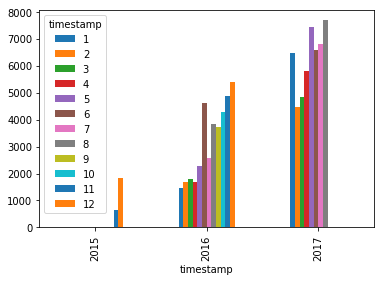

In [34]:
# ILLUSTRATION #1 popularity of the WeRateDogs account (time vs retweet count)
%matplotlib inline
import matplotlib.pyplot as plt
dft = df_final.groupby([df_final.timestamp.dt.year, df_final.timestamp.dt.month]).retweet_count.mean()
dft.unstack().plot(kind='bar')

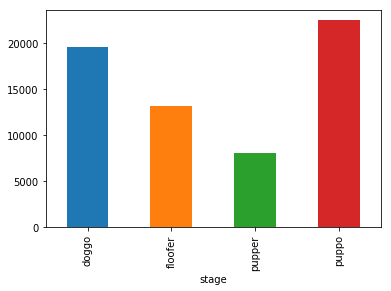

In [35]:
# ILLUSTRATION #2 everybody's favorite dog stage (favorite vs dog stage)

df_final.groupby('stage').favorite_count.mean().plot(kind = 'bar')

In [37]:
df_final.to_csv('twitter_archive_master.csv')